c:\Users\panb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


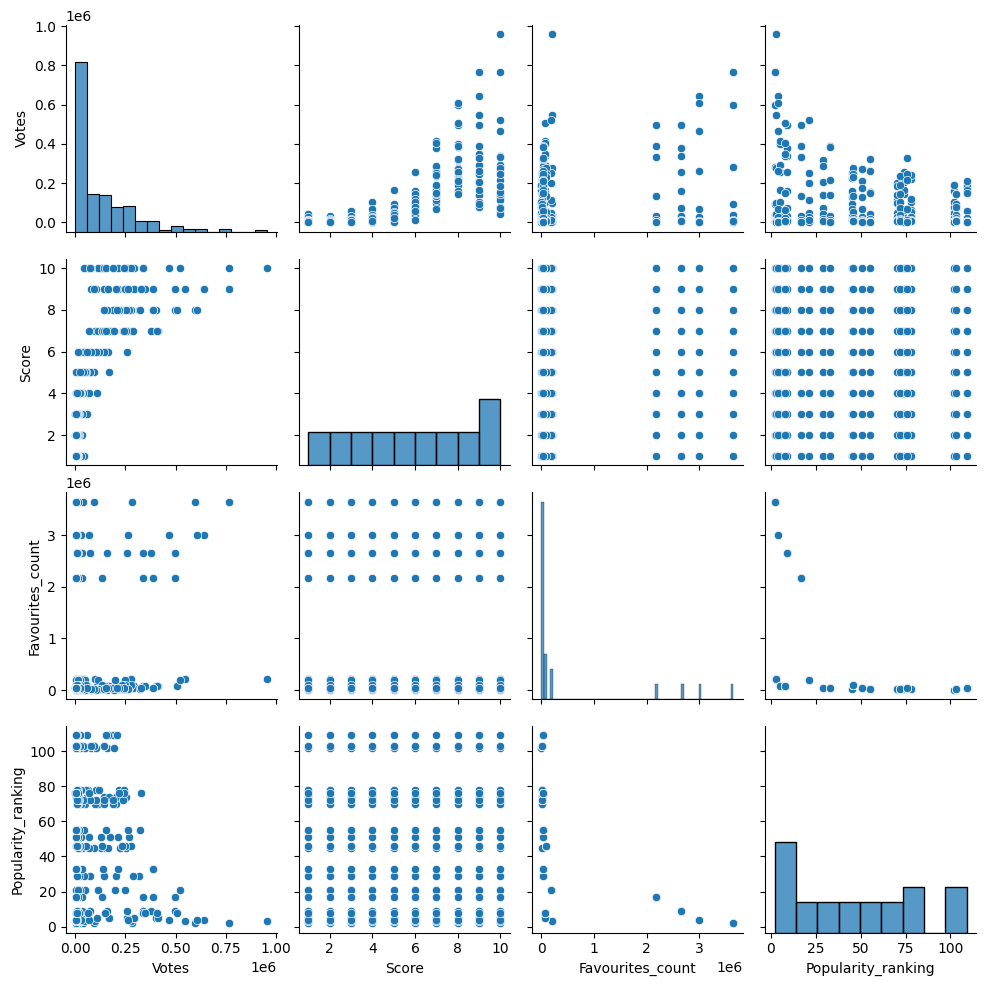

c:\Users\panb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\panb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\panb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\panb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

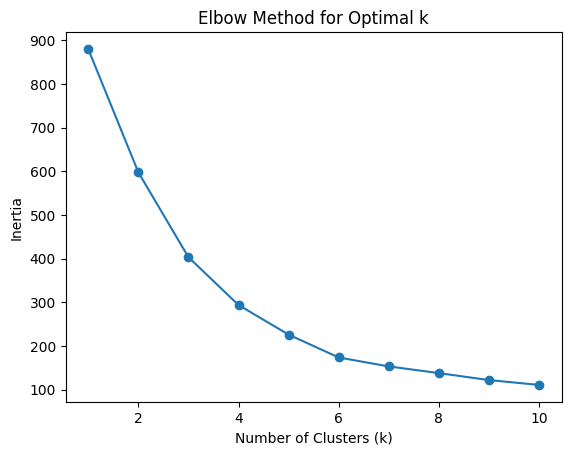

c:\Users\panb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\panb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


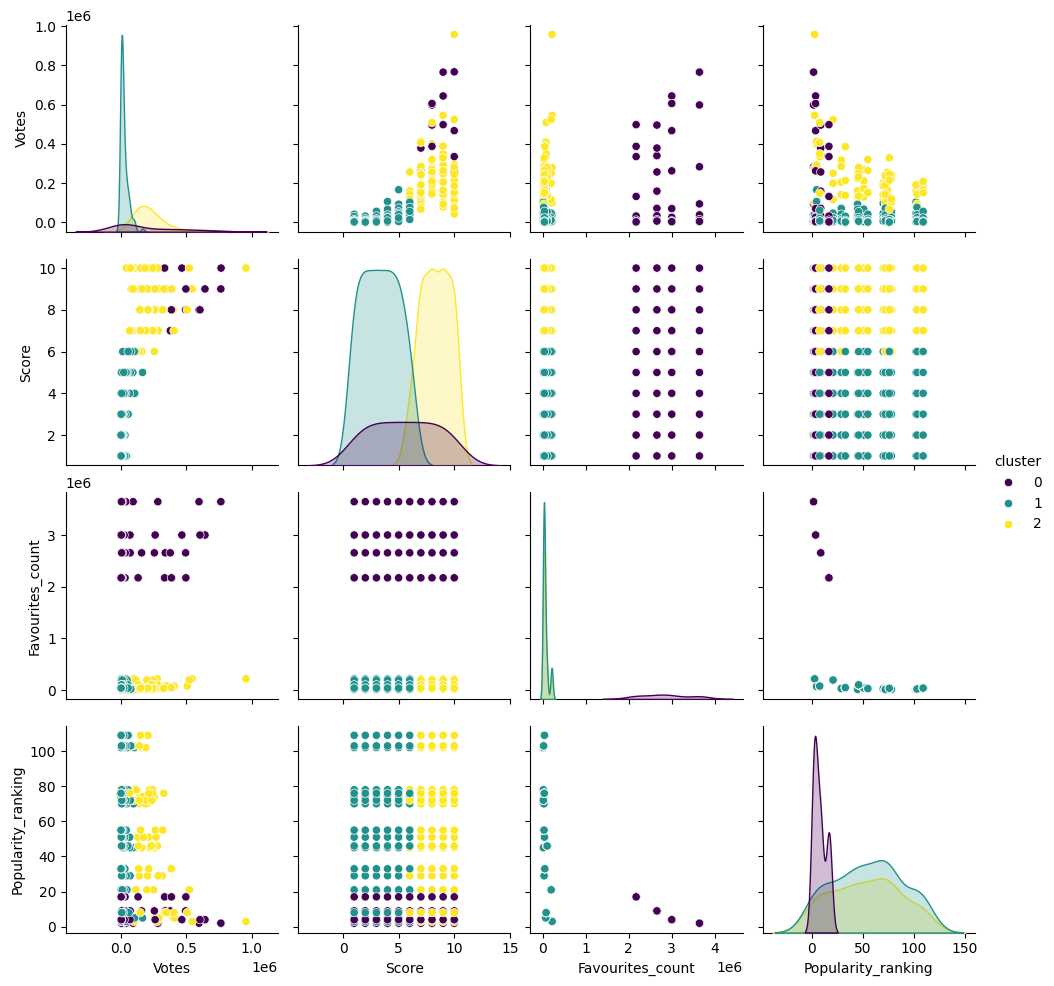

,English_Name,Score,Votes,Favourites_count,Popularity_ranking
0,Death Note,10,766783,3645111.0,2
30,Sword Art Online,10,292978,66367.0,5
60,Tokyo Ghoul,10,256665,2654664.0,9
70,Naruto,10,335750,74942.0,8
260,One Piece,10,523822,191920.0,21
280,Akame ga Kill!,10,141005,27749.0,29
340,Mob Psycho 100,10,213409,44399.0,33
370,Jujutsu Kaisen,10,335048,2170632.0,17
440,Tokyo Ghoul √A,10,127815,10266.0,45
480,Neon Genesis Evangelion,10,279291,98580.0,46


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
anime_data = pd.read_csv('Votes_2023_03_16.csv')

# Display the first few rows of the dataset
anime_data.head()

# Data Cleaning
# Handle missing values
anime_data.dropna(subset=['Votes', 'Score', 'Favourites_count', 'Popularity_ranking'], inplace=True)

# Feature Selection
selected_features = ['Votes', 'Score', 'Favourites_count', 'Popularity_ranking']
anime_subset = anime_data[selected_features]

# Exploratory Data Analysis (EDA)
# Visualize distribution of numerical features
sns.pairplot(anime_subset)
plt.show()

# Clustering Analysis
# Standardize numerical features for clustering
scaler = StandardScaler()
anime_subset_scaled = scaler.fit_transform(anime_subset)

# Determine the number of clusters (k) using the Elbow Method
# [Insert code for determining k, e.g., Elbow Method]
# Determine the number of clusters (k) using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(anime_subset_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, manually choose the optimal k (number of clusters)
k = 3  

# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
anime_subset['cluster'] = kmeans.fit_predict(anime_subset_scaled)

# Visualize clusters
sns.pairplot(anime_subset, hue='cluster', palette='viridis')
plt.show()


# Results
# Display the top 10 most popular anime based on user ratings
top_10_anime = anime_data.sort_values(by='Score', ascending=False).head(10)
top_10_anime[['English_Name', 'Score', 'Votes', 'Favourites_count', 'Popularity_ranking']]
